# Intro to SymPy 


[SymPy](https://www.sympy.org/)   is a Python library for symbolic mathematics. This notebook is from [here](https://www.sympy.org/scipy-2017-codegen-tutorial/notebooks/01-intro-sympy.html).

Here we give a (quick) introduction to SymPy. This tutorial assumes you are already familiar with SymPy expressions, so this notebook should serve as a refresher.

## Expressions

The function `init_printing()` will enable LaTeX pretty printing in the notebook for SymPy expressions. We recommend calling it at the top of any notebook that uses SymPy.

In [1]:
from sympy import *
init_printing()

SymPy symbols are created with the `symbols()` function. SymPy expressions are built up from symbols, numbers, and SymPy functions, 

In [2]:
x, y, z = symbols('x y z')

SymPy automatically pretty prints symbols with greek letters and subscripts.

In [3]:
alpha1, omega_2 = symbols('alpha1 omega_2')
alpha1, omega_2

In [4]:
sin(x + 1) - cos(y)

### Exercise

Write a symbolic expression for $$\frac{1}{\sqrt{2\pi\sigma^2} } \; e^{ -\frac{(x-\mu)^2}{2\sigma^2} }.$$ Remember that the function for $e^x$ is `exp(x)`. You will need to create symbols for `sigma` and `mu`. Square root is `sqrt`.

In [5]:
# Write your answer here


## Some reminders on common gotchas:

Dividing two integers in Python creates a float, like `1/2` -> `0.5`. If you want a rational number, use `Rational(1, 2)` or `S(1)/2`. 

In [5]:
x + 1/2

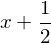

In [6]:
x + S(1)/2

`^` is the XOR operator. Use `**` for powers. 

In [7]:
x ^ y

In [8]:
x ** y

All SymPy expressions are immutable. Functions that operate on an expression return a new expression.

In [9]:
expr = x + 1
expr

In [10]:
expr.subs(x, 2)

In [11]:
expr

## Floating point representation

Since most languages targeted will not support symbolic representation it is useful to let SymPy evaluate a floating point approximation (up to a user specified number of digits).

In [12]:
sqrt(2)

In [13]:
sqrt(2).evalf(7)

### Exercise
Compute 100 digits of $\pi$.

In [14]:
# Write your answer here


## Undefined functions

Undefined functions are created with `Function()`. Undefined are useful to state that one variable depends on another (for the purposes of differentiation).

In [15]:
f = Function('f')

In [16]:
f(x) + 1

## Derivatives

Derivatives are computed with the `diff()` function, using the syntax `diff(expr, var1, var2, ...)`.

In [17]:
diff(sin(x + 1)*cos(y), x, y)

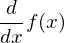

In [18]:
diff(f(x) + 1, x)

### Exercise

Write an expression representing the wave equation in one dimension: $${\partial^2 u\over \partial t^2 } = c^2 { \partial^2 u\over \partial  x^2}.$$ Remember that $u$ is a function in two variables. You can represent an equation using `Eq`, like

In [19]:
Eq(x, y)

In [20]:
# Write your answer here


## Matrices
Matrices are created with `Matrix`. A matrix can contain any symbolic expression. See `Matrix?` for different ways to create a Matrix.

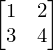

In [21]:
Matrix([[1, 2], [3, 4]])

In [22]:
# An unnested list will create a column vector
Matrix([1, 2, 3])

In [23]:
Matrix([x, y, z])

Matrices support all common operations, and have many methods for performing operations.

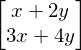

In [24]:
Matrix([[1, 2], [3, 4]])*Matrix([x, y])

for example, calculating the Jacobian matrix is as easy as:

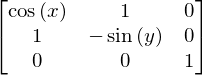

In [25]:
Matrix([sin(x) + y, cos(y) + x, z]).jacobian([x, y, z])

and for those of you who don't remember, the Jacobian is defined as:

$$
J = \begin{bmatrix}
\frac{\partial f_1}{\partial x_1} &  \frac{\partial f_1}{\partial x_2} & \cdots \\
\frac{\partial f_2}{\partial x_1} &  \frac{\partial f_2}{\partial x_2} & ~ \\
\vdots                            &  ~ & \ddots \\
\end{bmatrix}
$$

you will come across this mathematical entity in later notebooks in this tutorial.

### Exercise

Create the following matrix $$\left[\begin{matrix}1 & 0 & 1\\-1 & 2 & 3\\1 & 2 & 3\end{matrix}\right]$$

In [26]:
# Write your answer here


Now create a matrix representing $$\left[\begin{matrix}x\\y\\z\end{matrix}\right]$$ and multiply it with the previous matrix to get $$\left[\begin{matrix}x + z\\- x + 2 y + 3 z\\x + 2 y + 3 z\end{matrix}\right].$$



In [27]:
# Write your answer here


Now take the Jacobian of that matrix with respect to your column vector, to get the original matrix back.

In [28]:
# Write your answer here


## Matrix symbols

SymPy can also operate on matrices of symbolic dimension ($n \times m$). `MatrixSymbol("M", n, m)` creates a matrix $M$ of shape $n \times m$. 

In [29]:
n, m = symbols('n m', integer=True)
M = MatrixSymbol("M", n, m)
b = MatrixSymbol("b", m, 1)

In [30]:
M*b

In [31]:
(M*b).shape

Some matrix expression functions do not evaluate unless you call `doit`.

In [32]:
Transpose(M*b)

In [33]:
Transpose(M*b).doit()

### Exercise

Write a matrix expression representing $$Au + Bv,$$ where $A$ and $B$ are $100\times 100$ and $u$ and $v$ are $100 \times 1$.

In [34]:
# Write your answer here


## Indexed
Indexed symbols can be created with `IndexedBase` and `Idx`. `IndexedBase("A")` represents an array `A` and `Idx('i')` represents an index `i`. You can also use `symbols('i')` instead of `Idx('i')`.

In [35]:
A = IndexedBase("A")
i = Idx('i')

In [36]:
A[i]

### Exercise

Write an Indexed expression for $$A[i, j, k]$$

In [37]:
# Write your answer here


## Solving systems of equations

A useful tool in your toolbelt when manipulating expressions is the ``solve`` function. `solve` solves equations symbolically (not numerically). The return value is a list of solutions.

You can give `solve` an `Eq`, or if you give it an expression, it automatically assumes that it is equal to 0.

In [38]:
solve(Eq(x**2, 4), x)

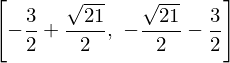

In [39]:
solve(x**2 + 3*x - 3, x)

It can also handle systems of equations. The return is a list of dictionaries, mapping symbols to solutions.

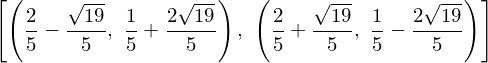

In [40]:
eq1 = x**2 + y**2 - 4  # circle of radius 2
eq2 = 2*x + y - 1  # straight line: y(x) = -2*x + 1
solve([eq1, eq2], [x, y])

### Exercises 

Solve the following system of equations: $$\begin{align}z &= x^2 - y^2\\z^2 &= x^2 + y^2 + 4\\z &= x + y\end{align}$$

In [41]:
# Write your answer here


## Solving differential equations
If you are dealing with a differential equation, say:

$$
f''(x) = -f(x)
$$

SymPy's dsolve can (sometimes) produce an exact symbolic solution. Like `solve`, `dsolve` assumes that expressions are equal to 0. 

In [42]:
f = Function('f')

In [43]:
dsolve(f(x).diff(x, 2) + f(x))

### Exercise

Solve the following ODE: $$f''(x) + 2f'(x) + f(x) = \sin(x)$$

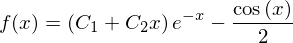

In [44]:
# Write your answer here